In [8]:
! ls Datasets/scrapped/All


Fire  NoFire


In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [2]:
DATADIR = '/Users/sivaluxan/Documents/AI/MLP/Project/FireNet-LightWeight-Network-for-Fire-Detection/Training Dataset'
CATEGORIES = ['Fire', 'NoFire']

In [17]:
IMG_SIZE = 64
def create_training_data():
    training_data = []
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=C 1=O

        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
              
    return training_data

In [18]:
training_data = create_training_data()


100%|██████████████████████████████████████| 1301/1301 [00:07<00:00, 163.43it/s]


In [21]:
import random

print(len(training_data))
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

2423
1
1
1
1
1
1
0
1
1
1


In [22]:
X = []
Y = []

for features,label in training_data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X = X/255.0
X.shape[1:]

(64, 64, 3)

In [23]:
# # set up image augmentation
# from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#     rotation_range=15,
#     horizontal_flip=True,
#     width_shift_range=0.1,
#     height_shift_range=0.1
#     #zoom_range=0.3
#     )
# datagen.fit(X)

In [24]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, AveragePooling2D

model = Sequential()


model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=2, activation = 'softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])




In [25]:
X=np.array(X)
Y=np.array(Y)
history = model.fit(X, Y, batch_size=32, epochs=100,validation_split=0.3)
# model.fit_generator(datagen.flow(X, Y, batch_size=32),
#                     epochs=100,
#                     verbose=1)


Epoch 1/100
53/53 [==============================] - 1s 18ms/step - loss: 0.6096 - accuracy: 0.6521 - val_loss: 0.5743 - val_accuracy: 0.7043
Epoch 2/100
53/53 [==============================] - 1s 17ms/step - loss: 0.5276 - accuracy: 0.7482 - val_loss: 0.5415 - val_accuracy: 0.7249
Epoch 3/100
53/53 [==============================] - 1s 17ms/step - loss: 0.4954 - accuracy: 0.7677 - val_loss: 0.5113 - val_accuracy: 0.7414
Epoch 4/100
53/53 [==============================] - 1s 17ms/step - loss: 0.4723 - accuracy: 0.7830 - val_loss: 0.4930 - val_accuracy: 0.7524
Epoch 5/100
53/53 [==============================] - 1s 17ms/step - loss: 0.4612 - accuracy: 0.7978 - val_loss: 0.5584 - val_accuracy: 0.7043
Epoch 6/100
53/53 [==============================] - 1s 17ms/step - loss: 0.4615 - accuracy: 0.7948 - val_loss: 0.5528 - val_accuracy: 0.7249
Epoch 7/100
53/53 [==============================] - 1s 17ms/step - loss: 0.4287 - accuracy: 0.8042 - val_loss: 0.5787 - val_accuracy: 0.6864
Epoch 

53/53 [==============================] - 1s 17ms/step - loss: 0.1639 - accuracy: 0.9416 - val_loss: 0.2110 - val_accuracy: 0.9188
Epoch 59/100
53/53 [==============================] - 1s 17ms/step - loss: 0.1651 - accuracy: 0.9422 - val_loss: 0.3463 - val_accuracy: 0.8858
Epoch 60/100
53/53 [==============================] - 1s 18ms/step - loss: 0.1681 - accuracy: 0.9351 - val_loss: 0.2200 - val_accuracy: 0.9216
Epoch 61/100
53/53 [==============================] - 1s 18ms/step - loss: 0.1675 - accuracy: 0.9322 - val_loss: 0.2605 - val_accuracy: 0.9023
Epoch 62/100
53/53 [==============================] - 1s 18ms/step - loss: 0.1455 - accuracy: 0.9463 - val_loss: 0.2881 - val_accuracy: 0.8982
Epoch 63/100
53/53 [==============================] - 1s 18ms/step - loss: 0.1516 - accuracy: 0.9369 - val_loss: 0.2158 - val_accuracy: 0.9188
Epoch 64/100
53/53 [==============================] - 1s 17ms/step - loss: 0.1419 - accuracy: 0.9416 - val_loss: 0.3145 - val_accuracy: 0.9120
Epoch 65/100

In [11]:
model.save('/Users/sivaluxan/Documents/AI/MLP/Project/FireNet-LightWeight-Network-for-Fire-Detection/Trained_Model_FIreNet/Fire-64x64-color-v7.1-soft.h5')

/Users/sivaluxan/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


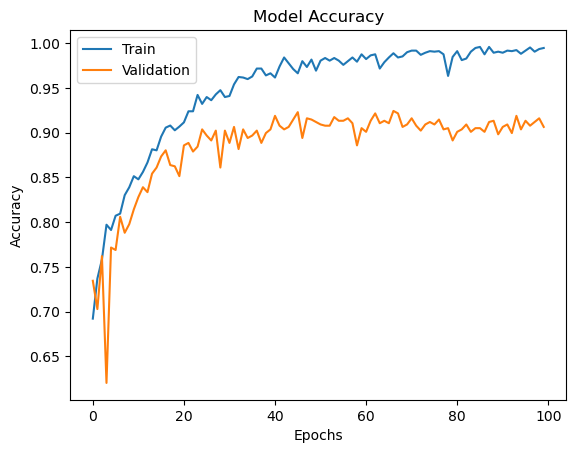

In [13]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

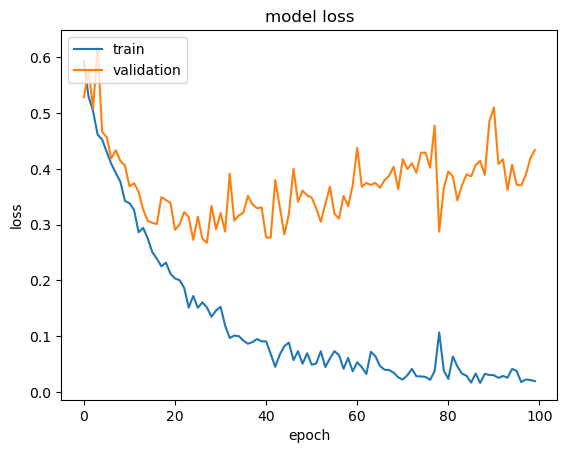

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [15]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
model = tf.keras.models.load_model('/Users/sivaluxan/Documents/AI/MLP/Project/FireNet-LightWeight-Network-for-Fire-Detection/Trained_Model_FIreNet/Fire-64x64-color-v7.1-soft.h5')

# model.fit_generator(datagen.flow(X, Y, batch_size=32),
#                     epochs=100,
#                   verbose=1)

In [33]:
# plot_model(model, to_file='model_small.svg', show_layer_names=False, show_shapes=True)

In [16]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 average_pooling2d (Average  (None, 31, 31, 16)        0         
 Pooling2D)                                                      
                                                                 
 dropout (Dropout)           (None, 31, 31, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 average_pooling2d_1 (Avera  (None, 14, 14, 32)        0         
 gePooling2D)                                                    
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0